In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance

import numpy as np
import re
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial as f


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib.font_manager import FontProperties
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from mlxtend.regressor import StackingRegressor

import warnings
warnings.filterwarnings('ignore')


# EDA 

In [2]:
df = pd.read_csv('Apps_data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2784,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## Checking if there are any duplicate entires.

def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [5]:
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [7]:
df.drop(df[df['Category'] == '1.9'].index, inplace = True)

In [8]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [9]:
## checking the percentage of missing values.

def check_missing_values(df):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(df)

percentage of missing data of dataframe 
 App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073801
Android Ver        0.018450
dtype: float64


In [10]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [11]:
#dropping the null values in column Rating

# df = df.dropna(subset = ['Rating'])
df = df[df['Rating'].notna()]
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [12]:
# #Categorize rating into High and Low
# for i in range(len(df['Rating'])):
#     if list(df['Rating'])[i] == 'unknown':
#         df['Rating'][i] = '0'
#         print(df['Rating'])
#     else:
#         pass
# Rating_Categories = ['High' if float(x) > 3.5 else 'Low' for x in list(df['Rating'])]
# print(Rating_categories)

In [13]:
check = df['Rating']
Rating_new = []
for i in check:
#     print( df['Rating'][i].type)
    if i > 3.5 :
        Rating_new.append("High")
    else:
        Rating_new.append("Low")
    
Rating_new

df["Rating_Category"] = Rating_new

In [14]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


In [15]:
print(df.isnull().sum())

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        4
Android Ver        2
Rating_Category    0
dtype: int64


In [16]:
count = df["Rating_Category"].value_counts()
x = ['High','Low']
y = [count[0] ,count[1]]

<BarContainer object of 2 artists>

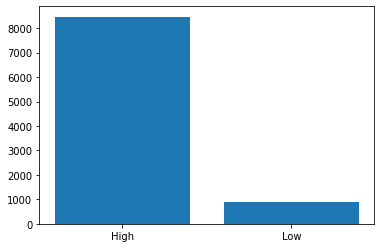

In [17]:
plt.bar(x,y)

There is an uneven distribution of High and Low categories.

In [18]:
df['Reviews'] = pd.to_numeric(df['Reviews'])


<AxesSubplot:xlabel='Reviews'>

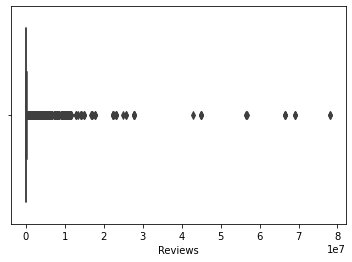

In [19]:
import seaborn as sns
sns.boxplot(df['Reviews'] )

In [20]:
# Position of the Outlier
lists = np.where(df['Reviews'] > 3 * 1e7)
lists[0]

array([ 323,  324,  369,  370, 1588, 1622, 1797, 2405, 2406, 2465, 2472,
       3752, 3757, 3791, 3832, 3851, 3950], dtype=int64)

In [21]:
df['Reviews'] = [np.log(x) for x in df['Reviews']]

In [22]:
indexAge = df[ (df["Size"] == 'Varies with device') ].index
df.drop(indexAge, inplace=True)

In [23]:
df['Size'] = df["Size"].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)


In [24]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,11.379508,8700000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.784190,619000,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High
10834,FR Calculator,FAMILY,4.0,1.945910,2600000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,3.637586,53000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.386294,3600000,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up,High


In [25]:
df['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [26]:
df['Installs'].value_counts()


1,000,000+        1302
100,000+          1037
10,000+            969
10,000,000+        825
1,000+             690
5,000,000+         535
500,000+           491
50,000+            437
5,000+             420
100+               303
100,000,000+       201
500+               197
50,000,000+        147
10+                 67
50+                 56
500,000,000+        30
1,000,000,000+      10
5+                   9
1+                   3
Name: Installs, dtype: int64

In [27]:
df['Installs'] = df['Installs'].apply(lambda x: x.strip('+'))


In [28]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', ''))

In [29]:
df['Installs'] = df['Installs'].replace("Free", '0')


In [30]:
#change the datatype of [Installs] from string to int
df['Installs']=df['Installs'].astype('int')
df['Installs'].dtypes

dtype('int32')

In [31]:
df['Price'].unique()


array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [32]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,11.379508,8700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.784190,619000,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High
10834,FR Calculator,FAMILY,4.0,1.945910,2600000,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,3.637586,53000000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.386294,3600000,100,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up,High


In [33]:
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))

In [34]:
df['Price'].unique()


array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [35]:
df['Price'] = df['Price'].apply(lambda x : x.replace('Everyone', '0'))
df['Price'] = df['Price'].astype('float')
print(f"Datatype of ['Price'] column is now : {df['Price'].dtypes}")

Datatype of ['Price'] column is now : float64


# Data preparation for model building

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7729 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7729 non-null   object 
 1   Category         7729 non-null   object 
 2   Rating           7729 non-null   float64
 3   Reviews          7729 non-null   float64
 4   Size             7729 non-null   int32  
 5   Installs         7729 non-null   int32  
 6   Type             7729 non-null   object 
 7   Price            7729 non-null   float64
 8   Content Rating   7729 non-null   object 
 9   Genres           7729 non-null   object 
 10  Last Updated     7729 non-null   object 
 11  Current Ver      7725 non-null   object 
 12  Android Ver      7727 non-null   object 
 13  Rating_Category  7729 non-null   object 
dtypes: float64(3), int32(2), object(9)
memory usage: 845.4+ KB


In [37]:
df = df.drop(['Rating'], axis=1)


In [38]:
df

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,6.874198,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,11.379508,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,3.784190,619000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High
10834,FR Calculator,FAMILY,1.945910,2600000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,3.637586,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,1.386294,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,High


In [39]:
df['Rating_Category'] = df['Rating_Category'].map({'High': 1, 'Low': 0})


In [40]:
df

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,6.874198,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,11.379508,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,3.784190,619000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,1
10834,FR Calculator,FAMILY,1.945910,2600000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,1
10836,Sya9a Maroc - FR,FAMILY,3.637586,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,1.386294,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,1


In [42]:
df = df.drop(['Last Updated','Current Ver','Android Ver'],axis=1)

In [43]:
df

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19000000,10000,Free,0.0,Everyone,Art & Design,1
1,Coloring book moana,ART_AND_DESIGN,6.874198,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,1
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,11.379508,8700000,5000000,Free,0.0,Everyone,Art & Design,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25000000,50000000,Free,0.0,Teen,Art & Design,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,1
...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,3.784190,619000,1000,Free,0.0,Everyone,Books & Reference,1
10834,FR Calculator,FAMILY,1.945910,2600000,500,Free,0.0,Everyone,Education,1
10836,Sya9a Maroc - FR,FAMILY,3.637586,53000000,5000,Free,0.0,Everyone,Education,1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,1.386294,3600000,100,Free,0.0,Everyone,Education,1


In [50]:
from sklearn import preprocessing

label_encode = preprocessing.LabelEncoder()

df['App'] = label_encode.fit_transform(df['App'])
df['Category'] = label_encode.fit_transform(df['Category'])
df['Type'] = label_encode.fit_transform(df['Type'])
df['Content Rating'] = label_encode.fit_transform(df['Content Rating'])
df['Genres'] = label_encode.fit_transform(df['Genres'])

In [51]:
X_scaled = df.copy()


In [52]:
ss = StandardScaler()
X_scaled.iloc[:,:] = ss.fit_transform(X_scaled.iloc[:,:])
X_scaled.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating_Category
0,0.740284,-2.036077,-0.700958,-0.168811,-0.167701,-0.284568,-0.064805,-0.468779,-1.608580,0.34919
1,-0.815921,-2.036077,-0.217855,-0.382086,-0.157928,-0.284568,-0.064805,-0.468779,-1.545655,0.34919
2,1.370060,-2.036077,0.987780,-0.608157,-0.068170,-0.284568,-0.064805,-0.468779,-1.608580,0.34919
3,1.060593,-2.036077,1.229125,0.087118,0.829402,-0.284568,-0.064805,2.501050,-1.608580,0.34919
4,0.760981,-2.036077,-0.217855,-0.859820,-0.165906,-0.284568,-0.064805,-0.468779,-1.577118,0.34919


# Model training, and testing

In [53]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [76]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

In [77]:
print("Train R2_score",r2_score(y_train,y_train_pred))
print("Test R2_score",r2_score(y_test,y_test_pred))

Train R2_score 1.0
Test R2_score -0.6826046854823835


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score, mean_absolute_error
clf = RandomForestRegressor()
clf.fit(X_train, y_train)


RandomForestRegressor()

In [71]:
y_test_predict = clf.predict(X_test)

In [72]:
print(r2_score(y_test,y_test_predict))

0.10087808430178935


In [78]:
ada = AdaBoostRegressor(base_estimator=dt, random_state=7, learning_rate=0.1)
ada.fit(X_train,y_train)
y_test_pred = ada.predict(X_test)
y_train_pred = ada.predict(X_train)


In [79]:
print(ada)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  random_state=7)


In [80]:
print("Train R2_score",r2_score(y_train,y_train_pred))
print("Test R2_score",r2_score(y_test,y_test_pred))

Train R2_score 1.0
Test R2_score -0.15500830105146668


In [81]:
sr = StackingRegressor(regressors=[LinearRegression(),DecisionTreeRegressor(max_depth=7),AdaBoostRegressor()],
                       meta_regressor = RandomForestRegressor(n_estimators=30))
sr

StackingRegressor(meta_regressor=RandomForestRegressor(n_estimators=30),
                  regressors=[LinearRegression(),
                              DecisionTreeRegressor(max_depth=7),
                              AdaBoostRegressor()])

In [82]:
sr.fit(X_train,y_train)
y_test_pred = sr.predict(X_test)
y_train_pred = sr.predict(X_train)

In [83]:
print("Train R2_score",r2_score(y_train,y_train_pred))
print("Test R2_score",r2_score(y_test,y_test_pred))

Train R2_score 0.8393907927659716
Test R2_score -0.31635939586792117


We can see the different accuracy scores for our model.

  The future would be to take cross-validation steps into account and then train different models.